## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [1]:
NAME = "Konstantinos Nikiforidis"
AEM = "9084/ece_auth"

---

# Assignment 2 - Decision Trees #

Welcome to your second assignment. This exercise gives you an introduction to [scikit-learn](https://scikit-learn.org/stable/). A simple but efficient machine learning library in Python. It also gives you a wide understanding on how decision trees work. 

After this assignment you will:
- Be able to use the scikit-learn library and train your own model from scratch.
- Be able to train and understand decision trees.

In [2]:
# Always run this cell
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import unittest

# USE THIS RANDOM VARIABLE TO PRODUCE THE SAME RESULTS
RANDOM_VARIABLE = 42

## 1. Scikit-Learn and Decision Trees ##

You are going to use the scikit-learn library to train a model for detecting breast cancer using the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset) by training a model using [decision trees](https://scikit-learn.org/stable/modules/tree.html).

**1.1** Load the breast cancer dataset using the scikit learn library and split the dataset into train and test set using the appropriate function. Use 30% of the dataset as the test set. Define as X the attributes and as y the target values. Do not forget to set the random_state parameter as the *RANDOM_VARIABLE* defined above. Use this variable for all the random_state parameters in this assignment.

In [3]:
# BEGIN CODE HERE
cancer_data = load_breast_cancer()
X,y = cancer_data.data, cancer_data.target
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_VARIABLE) 

#END CODE HERE

In [4]:
print("Size of train set:{}".format(len(y_train)))
print("Size of test set:{}".format(len(y_test)))
print("Unique classes:{}".format(len(set(y_test))))

Size of train set:398
Size of test set:171
Unique classes:2


**Expected output**:  
Size of train set:398  
Size of test set:171  
Unique classes:2  

**1.2** Train two DecisionTree classifiers and report the F1 score. Use the information gain for the one classifier and the Gini impurity for the other

In [5]:
# BEGIN CODE HERE
classifier_gini = DecisionTreeClassifier(criterion="gini", random_state=RANDOM_VARIABLE)
classifier_igain = DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_VARIABLE)

classifier_gini.fit(X_train, y_train)
classifier_igain.fit(X_train, y_train)

prediction_gini = classifier_gini.predict(X_test)
prediction_igain = classifier_igain.predict(X_test)

f_measure_gini = f1_score(y_test, prediction_gini)
f_measure_igain = f1_score(y_test, prediction_igain)

#END CODE HERE

In [6]:
print("F-Measure Gini:{}".format(f_measure_gini))
print("F-Measure Information Gain:{}".format(f_measure_igain))

F-Measure Gini:0.9528301886792453
F-Measure Information Gain:0.9724770642201834


**Expected output**:  
F-Measure Gini:0.9528301886792453  
F-Measure Information Gain:0.9724770642201834  


**1.3** Find the maximum depth reached by the tree that used the Gini impurity. Train multiple classifier by modifying the max_depth within the range from 1 to maximum depth and save the f1 scores to lists.  

In [7]:
# BEGIN CODE HERE
depth = list(range(1, classifier_gini.get_depth()+1)) # lista me ta max_depth pou tha testarw
fscores_train = [f1_score(y_train, DecisionTreeClassifier(criterion="gini", random_state=RANDOM_VARIABLE, max_depth=i).fit(X_train, y_train).predict(X_train)) for i in depth]
fscores_test = [f1_score(y_test, DecisionTreeClassifier(criterion="gini", random_state=RANDOM_VARIABLE, max_depth=i).fit(X_train, y_train).predict(X_test)) for i in depth]

#END CODE HERE

In [8]:
print("Fscores Train:{}".format(fscores_train))
print("Fscores Test:{}".format(fscores_test))


Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]


**Expected output**:  
Fscores Train:[0.9392712550607287, 0.9533468559837729, 0.9761904761904762, 0.996, 0.996, 0.9979959919839679, 1.0]  
Fscores Test:[0.9150943396226415, 0.9444444444444444, 0.9724770642201834, 0.9629629629629629, 0.9629629629629629, 0.9674418604651163, 0.9528301886792453]



**1.4** Compare the results from the train set with the results from the test set. What do you notice? Explain your findings. How are you going to choose the max_depth of your model?

## Απάντηση ##
**1.4** Γενικότερα, βλέπουμε ότι το μοντέλο έχει πετύχει πολύ καλά f1_scores. Παρατηρώντας το σύνολο των αποτελεσμάτων, διαπιστώνουμε ότι το καλύτερο max_depth που μπορούμε να βάλουμε ώς παράμετρο στο decision tree, ώστε να μην κάνει overfitting είναι το max_depth=3. Αυτό συμβαίνει, γιατί όπως φαίνεται και απο τις λίστες με τα f1_scores παραπάνω, μετα την επανάληψη με max_depth=3, στο μοντέλο ξεκινάει να πέφτει το f1_score στο test_data και να ανεβαίνει στο train_data. Αυτό σημαίνει ότι έχει ξεκινήσει το overfitting.

## 2.0 Pipelines ##

**2.1** In this part of the exercise you are going to build a pipeline from scratch for a classification problem. Load the **income.csv** file and train a DecisionTree model that will predict the *income* variable. This dataset is a modification of the original Adult Income dataset found [here](http://archive.ics.uci.edu/ml/datasets/Adult). Report the f1-score and accuracy score of the test set found in **income_test.csv**. Your pipeline should be able to handle missing values and categorical features (scikit-learn's decision trees do not handle categorical values). You can preprocess the dataset as you like in order to achieve higher scores.  

In [9]:
# BEGIN CODE HERE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv("income.csv")
test_data = pd.read_csv("income_test.csv")
###########################################################################################################################
train_data = train_data[~train_data.isna().any(axis=1)] #diwxnw ta data pou leipoun times apo to workclass kai to occupation
train_data = train_data.reset_index(drop=True) #reset to index 
# train_data
train_data = train_data.replace("<=50K", 0) # income --> 0,1 
train_data = train_data.replace(">50K", 1)
train_data = train_data.replace("Female", 0)    # sex--> 0,1
train_data = train_data.replace("Male", 1)
# test_data
test_data = test_data.replace("<=50K", 0) # income --> 0,1 
test_data = test_data.replace(">50K", 1)
test_data = test_data.replace("Female", 0)  # sex--> 0,1
test_data = test_data.replace("Male", 1)
# final_train_test_data
final_train_data_Y = train_data["income"]
final_test_data_Y = test_data["income"]
final_train_data = train_data.drop(["income"], axis=1)
final_test_data = test_data.drop(["income"], axis=1)

# one-hot encode categorical data
final_train_data = final_train_data.select_dtypes(exclude=[object])
final_test_data = final_test_data.select_dtypes(exclude=[object])

object_columns = train_data.select_dtypes(include=[object]).columns

for i in object_columns: # build train data
    encoder = LabelEncoder()
    label_encoded = encoder.fit_transform(train_data[i])  # Never-worked den exei pouthena
    encoder_1hot = OneHotEncoder()
    label_encoded_1hot = encoder_1hot.fit_transform(label_encoded.reshape(-1,1))
    columns = encoder.classes_
    temp_df = pd.DataFrame(data=label_encoded_1hot.toarray(), columns=columns)
    final_train_data = pd.concat([final_train_data, temp_df], axis=1)

for i in object_columns: # build test data
    encoder = LabelEncoder()
    label_encoded = encoder.fit_transform(test_data[i])  # Never-worked den exei pouthena
    encoder_1hot = OneHotEncoder()
    label_encoded_1hot = encoder_1hot.fit_transform(label_encoded.reshape(-1,1))
    columns = encoder.classes_
    temp_df = pd.DataFrame(data=label_encoded_1hot.toarray(), columns=columns)
    final_test_data = pd.concat([final_test_data, temp_df], axis=1)


# peirama opws kai sto vima 1 gia na vroume to veltisto max_depth gia na mhn ginetai overfitting
classifier_gini = DecisionTreeClassifier(criterion="gini", random_state=RANDOM_VARIABLE) 
classifier_gini.fit(final_train_data, final_train_data_Y)
depth = list(range(1, classifier_gini.get_depth()+1)) # lista me ta max_depth pou tha testarw
fscores_train = [f1_score(final_train_data_Y, DecisionTreeClassifier(criterion="gini", random_state=RANDOM_VARIABLE, max_depth=i).fit(final_train_data, final_train_data_Y).predict(final_train_data)) for i in depth]
fscores_test = [f1_score(final_test_data_Y, DecisionTreeClassifier(criterion="gini", random_state=RANDOM_VARIABLE, max_depth=i).fit(final_train_data, final_train_data_Y).predict(final_test_data)) for i in depth]

# print("Fscores Train:{}".format(fscores_train))
# print("Fscores Test:{}".format(fscores_test))
print("Best Fscore for Test dataset is: {}".format(max(fscores_test)))
print("And its index is: {}".format(fscores_test.index(max(fscores_test))))

# epilegw max_depth=9
classifier_gini = DecisionTreeClassifier(criterion="gini", random_state=RANDOM_VARIABLE, max_depth=9) 
classifier_gini.fit(final_train_data, final_train_data_Y)
prediction_gini = classifier_gini.predict(final_test_data)
f_measure_gini = f1_score(final_test_data_Y, prediction_gini)
accuracy_train_gini = classifier_gini.score(final_train_data, final_train_data_Y)
accuracy_test_gini = classifier_gini.score(final_test_data, final_test_data_Y)

print("F-Measure Gini:{}".format(f_measure_gini))
print("Train Accuracy Gini:{}".format(accuracy_train_gini))
print("Test Accuracy Gini:{}".format(accuracy_test_gini))



fScore = f_measure_gini
accScore = accuracy_test_gini

#END CODE HERE

Best Fscore for Test dataset is: 0.6706319702602231
And its index is: 9
F-Measure Gini:0.6456569457510192
Train Accuracy Gini:0.8602773618074093
Test Accuracy Gini:0.8524322559582109


**2.2** Describe the process you followed to achieve the results above. Your description should include, but is not limited to the following 
- How do you handle missing values and why
- How do you handle categorical variables and why
- Any further preprocessing steps
- How do you evaluate your model and how did you choose its parameters 
- Report any additional results and comments on your approach.

## Απάντηση ##
**2.2** Βλέπουμε ότι το income dataset περιέχει και categorical μεταβλητές, μεταβλητές τις οποίες ένα dicision tree στο sklearn δε μπορεί να χειριστεί. Οι μεταβλητές αυτές είναι οι εξής: 
- workclass (8 κλάσεις)
- education (7 κλάσεις)
- marital-status (4 κλάσεις)
- occupation (14 κλάσεις)
- relationship (6 κλάσεις)
- race (5 κλάσεις)
- sex (2 κλάσεις)
- income (2 κλάσεις)

Επιπλέον, το income training dataset(income.csv) έχει και missing values. Με μία πρώτη ματιά, βλέπουμε ότι λείπουν 1836 τιμές από την μεταβλητή *workclass* και 1843 τιμές από την μεταβλητή *occupation*. Με μία καλύτερη ανάλυση όμως, βλέπουμε ότι τα data με missing values στο workclass συμπίπτουν ακριβώς με τα data που έχουν missing values στο occupation. Αυτό σημαίνει ότι έχουμε 1836 data με missing values στο workclass και στο occupation, και 7 data που έχουν missing values μόνο στο occupation. Επίσης, με ένα ακόμα βήμα προεπεξεργασίας βλέπουμε ότι τα μοναδικά data από το training_dataset που έχουν τιμές *workclass=="Never-worked"* είναι τα 7 data στα οποία λείπει το occupation αλλά όχι το workclass. 

Ο τρόπος που αποφάσισα να χειριστώ τα missing values είναι ο τρόπος της διαγραφής και αυτό γιατί:
- τα missing values είναι περίπου μόνο το 5% του αρχικού training dataset (1843 από τα 32561)
- τα missing values είναι πάνω σε κατηγορηματικές μεταβλητές οι οποίες δεν είναι ταξινομημένες π.χ., (low, medium, large). Συνεπώς, το να κωδικοποιήσουμε τις τιμές αυτές, σε διακριτές αριθμητικές τιμές π.χ., (1,2,3,4...) και μετά να φτιάξουμε έναν predictor για να προβλέψει αυτές τις τιμές, με βάση το υπόλοιπο training dataset, θα ήταν λάθος. Επιπλέον, το occupation έχει 14 κλάσεις, κάτι το οποίο μας προϊδεάζει ότι τα αποτελέσματα του predictor ίσως να μην είναι τόσο σωστά. Είναι λογικό, ένα binary πρόβλημα ταξινόμησης να είναι πιο "εύκολο" από ένα πρόβλημα ταξινόμησης με 14 κλάσεις. 

Ο τρόπος που αποφάσισα να χειριστώ τις κατηγορηματικές μεταβλητές είναι ο τρόπος της κωδικοποίησης One-hot.
Νομίζω για ένα decision tree, είναι ο πιο διαδεδομένος και αποδοτικότερος τρόπος να χειριστεί κανείς τις κατηγορηματικές τιμές.
Για τις μεταβλητές sex και income, απλά αντικαθιστούμε με 0 και 1 αφού είναι binary μεταβλητές. Για τις υπόλοιπες μεταβλητές, φτιάχνουμε από μία στήλη για τη κάθε κλάση, και κάθε data παίρνει 0 ή 1, ανάλογα αν ανήκει σε εκείνη την κλάση. Για παράδειγμα, για την μεταβλητή race δημιουργούμε 5 νέες στήλες στο dataset(και διαγράφουμε την race). Οι στήλες αυτές, έχουν ονόματα:
- Amen-Indian-Eskimo
- White
- Asian-Pac-Islander
- Black
- Other


Το μοντέλο αξιολογήθηκε με βάση το accuracy και το f1_score τόσο στο train set όσο και στο test set.
Στη συνέχεια, ακολούθησα παρόμοια τακτική με το 1ο ερώτημα, ώστε να βρω το βέλτιστο max_depth πριν το μοντέλο ξεκινήσει να κάνει overfitting. Το βέλτιστο max_depth είναι το max_depth=9. Επίσης, δοκίμασα να χρησιμοποιήσω και το κριτήριο της εντροπίας, αλλά οι διαφορές ήταν πολύ μικρές, οπότε προτιμήθηκε το κριτήριο του gini, μιας και το βέλτιστο δέντρο έιχε μικρότερο max_depth(gini_9 vs entropy_14).

## 3.0 Common Issues ## 

**3.0** Run the following code to define a DecisionTreeModel and load the **income** dataset only with the numerical variables. Then, answer the following questions. 

In [10]:
# Load Data
columns = ['age','fnlwgt','education_num','hours-per-week',"capital-loss","capital-gain","income"]
data = pd.read_csv('income.csv',usecols=columns)
data_test = pd.read_csv('income_test.csv',usecols=columns)
# Convert target variable to 0 and 1
data["income"] = data["income"].map({ "<=50K": 0, ">50K": 1 })
data_test["income"] = data_test["income"].map({ "<=50K": 0, ">50K": 1 })
# Create X and y
X_train = data.drop(["income"],axis=1)
y_train = data['income'].values
X_test = data_test.drop(["income"],axis=1)
y_test = data_test['income'].values
# Classifier
classifier = DecisionTreeClassifier(min_samples_leaf=4)

**3.1** Draw a learning curve for the classifer for the train and test set loaded above.

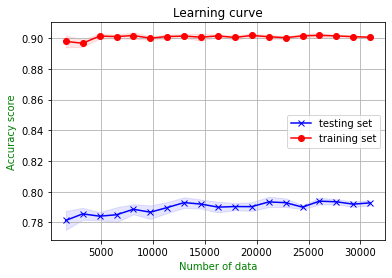

In [11]:
# BEGIN CODE HERE
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

def learning_curve(estimator, X_train, y_train, X_test, y_test):
    f_score_train = []
    f_score_test = []
    acc_train = []
    acc_test = []
    test_sizes_list = []
    max_depth = []
    
    test_sizes = np.arange(0.05, 1, 0.05).round(2)
    
    for i in test_sizes:
        # print(i)
        cv = StratifiedShuffleSplit(n_splits=5, train_size=i, random_state=42) # 5 fold cross validation
        for train_index, test_index in cv.split(X_train, y_train):
            test_sizes_list.append(X_train.iloc[train_index,:].shape[0])
            temp_estimator = estimator
            temp_estimator.fit(X_train.iloc[train_index,:], y_train[train_index])
            prediction_test = temp_estimator.predict(X_test)
            prediction_train = temp_estimator.predict(X_train.iloc[train_index,:])
            f_score_train.append(f1_score(y_train[train_index], prediction_train))
            f_score_test.append(f1_score(y_test, prediction_test))
            acc_train.append(temp_estimator.score(X_train.iloc[train_index,:], y_train[train_index]))
            acc_test.append(temp_estimator.score(X_test, y_test))
            max_depth.append(temp_estimator.get_depth())
            # print(max_depth)
            
            
    # vlepw max_depth apo oles tis epanlipseis gia na kanw to erwtima 3.3
    max_depth = np.array(max_depth)
    max_depth = max_depth.reshape((-1,5))
    max_depth_mean = np.mean(max_depth, axis=1)
    # print(max_depth)
    
    test_sizes_list = np.array(test_sizes_list)
    test_sizes_list = np.unique(test_sizes_list)
    #reshape
    f_score_train = np.array(f_score_train)
    f_score_train = f_score_train.reshape((-1,5))
    f_score_test = np.array(f_score_test)
    f_score_test = f_score_test.reshape((-1,5))
    acc_train = np.array(acc_train)
    acc_train = acc_train.reshape((-1,5))
    acc_test = np.array(acc_test)
    acc_test = acc_test.reshape((-1,5))
    
    f_scores_train_mean = np.mean(f_score_train, axis=1)
    f_scores_train_std = np.std(f_score_train, axis=1)
    f_scores_test_mean = np.mean(f_score_test, axis=1)
    f_scores_test_std = np.std(f_score_test, axis=1)
    acc_train_mean = np.mean(acc_train, axis=1)
    acc_train_std = np.std(acc_train, axis=1)
    acc_test_mean = np.mean(acc_test, axis=1)
    acc_test_std =np.std(acc_test, axis=1)
            
    # plots
    plt.figure()
    plt.fill_between(test_sizes_list, acc_train_mean - acc_train_std, acc_train_mean + acc_train_std, alpha=0.1, color="r")
    plt.fill_between(test_sizes_list, acc_test_mean - acc_test_std, acc_test_mean + acc_test_std, alpha=0.1, color="blue")
    plt.plot(test_sizes_list,acc_test_mean, "x-", color="blue", label="testing set")
    plt.plot(test_sizes_list, acc_train_mean, "o-", color="r", label="training set")
    plt.title("Learning curve")
    plt.grid(True)
    plt.xlabel("Number of data", color="green")
    plt.ylabel("Accuracy score", color="green")
    # plt.ylim([0.6, 1.1])
    # plt.yticks(np.arange(0.6,1.1,0.1))
    plt.legend(loc="best")


    
learning_curve(estimator=classifier,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

    
#END CODE HERE

**3.2** Do you notice any problems with the classifier? If so, what can you do to change this.

## Απάντηση ##
**3.2** Είναι ξεκάθαρο όπως έχουμε δει και από τις διαλέξεις, ότι εδώ έχουμε μια κατάσταση overfitting(high variance). 
Η λύση είναι:
1) να βάλουμε όριο στο max_depth του δέντρου

2) να υπάρχει όριο στα min_samples_leaf(το οποίο υπάρχει ήδη)

**3.3** Implement your solution using the cells below. Report your results and the process you followed. 

Basic classifier with min_samples_leaf=4 and max_depth=10
Final accuracy score is: 0.8256611165523996
Final f1_score is: 0.5569200132758049


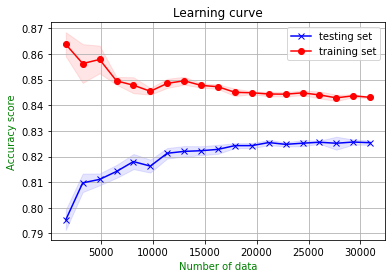

In [12]:
# BEGIN CODE HERE
print("Basic classifier with min_samples_leaf=4 and max_depth=10")
classifier = DecisionTreeClassifier(min_samples_leaf=4, max_depth=10,random_state=RANDOM_VARIABLE)
learning_curve(estimator=classifier,X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


prediction = classifier.fit(X_train, y_train).predict(X_test)
final_score = classifier.score(X_test, y_test)
final_f1_score = f1_score(y_test, prediction)
print("Final accuracy score is: {}\nFinal f1_score is: {}".format(final_score,final_f1_score))

#END CODE HERE

## Απάντηση ##
**3.3** Όπως είπαμε και παραπάνω, το βασικό που πρέπει να γίνει, είναι να θέσουμε ένα όριο στο max_depth του δέντρου. Σε δεύτερη μοίρα, μπορούμε να δοκιμάσουμε και διάφορες τιμές του min_samples_leaf >= 4. Μετά από αρκετές δοκιμές, κατέληξα στον συνδυασμό min_samples_leaf=4 και max_depth=10. Όπως φαίνεται και απο το learning curve, παρατηρούμε ότι έχουμε ένα αρκετά καλύτερο αποτέλεσμα, το οποίο πάει να προσεγγίσει μία ιδανική καμπύλη μάθησης.